In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Carbon Emission.csv")

# View structure
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [ ]:
# Define features and target
features = [
    'Diet',
    'Transport',
    'Heating Energy Source',
    'Vehicle Monthly Distance Km',
    'How Long TV PC Daily Hour',
    'How Long Internet Daily Hour',
    'Energy efficiency'
]
target = 'CarbonEmission'

X = df[features]
y = df[target]


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Diet', 'Transport', 'Heating Energy Source', 'Energy efficiency']
numeric_features = ['Vehicle Monthly Distance Km', 'How Long TV PC Daily Hour', 'How Long Internet Daily Hour']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Diet', 'Transport',
                                                   'Heating Energy Source',
                                                   'Energy efficiency']),
                                                 ('num', 'passthrough',
                                                  ['Vehicle Monthly Distance '
                                                   'Km',
                                                   'How Long TV PC Daily Hour',
                                                   'How Long Internet Daily '
                                                   'Hour'])])),
                ('regressor', LinearRegression())])

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 634035.38


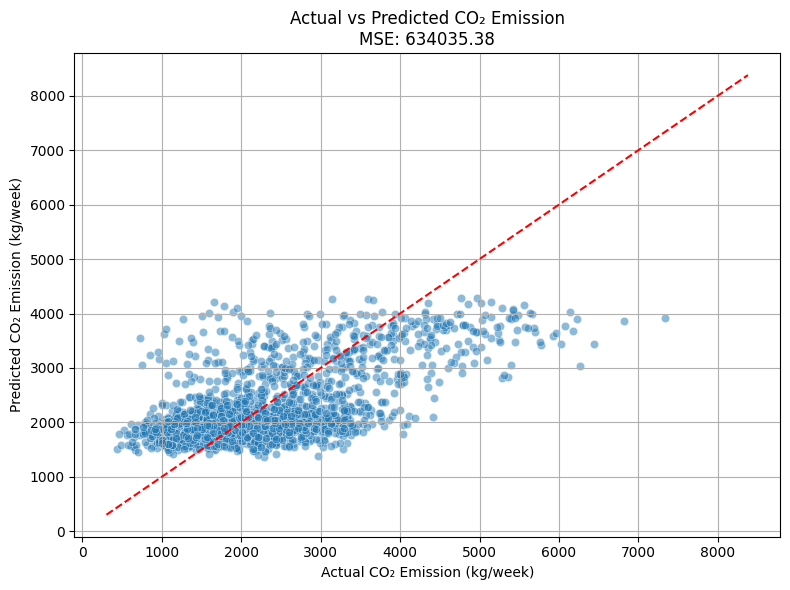

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual CO₂ Emission (kg/week)')
plt.ylabel('Predicted CO₂ Emission (kg/week)')
plt.title(f'Actual vs Predicted CO₂ Emission\nMSE: {mse:.2f}')
plt.grid(True)
plt.tight_layout()
plt.show()


# New Section

In [ ]:
import joblib

# After fitting the model:
joblib.dump(model, 'carbon_model.pkl')


['carbon_model.pkl']

# New Section